#### Plot some example VOCs for high and low position (Figure 1 in paper)

Import packages

In [1]:
import os
import chess
import chess.engine
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'


Link to folders with example depth_level (these are SFs selections at each depth for a move) and move_level (this is general move info, e.g. ply, fen, voc, etc.)

In [37]:
depth_folder = "/Users/erussek/Dropbox/Griffiths_Lab_Stuff/Code/Thinking_Time_VOC_Chess/example_SF_moves_by_depth"
file1 = os.path.join(depth_folder, 'example_depth_1.csv')
depth_df = pd.read_csv(file1)

file1 = os.path.join(depth_folder, 'example_move_1.csv')
move_df = pd.read_csv(file1)


#### High VOC Position

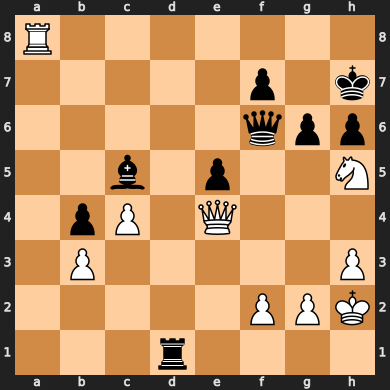

Low computation move: f6f2
 High computation move: f6f5


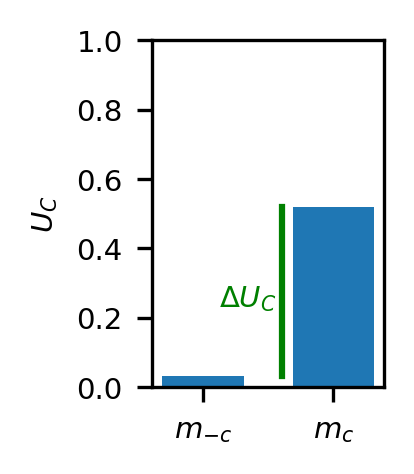

In [59]:
# get fen and display board
this_fen = 'R7/5p1k/5qpp/2b1p2N/1pP1Q3/1P5P/5PPK/3r4 b - - 7 37'

display(chess.Board(this_fen))

# get this position in move_df 
this_move = move_df.loc[move_df.board == this_fen].reset_index(drop=True)

# get this row in 'depth df' - this is where SF move selections at each depth were chosen
move_ply=this_move.move_ply[0]
game_id = this_move.game_id[0]
move_df_in = depth_df.loc[(depth_df.move_ply == move_ply) & (depth_df.game_id == game_id)].reset_index(drop = True)

# get score in win probability
score_wp = move_df_in['score_wp']

if ~move_df_in['white_active'][0]:
    score_wp = 1 - score_wp

### Plot positions
fig,ax = plt.subplots(1,figsize = (1,1.5), dpi = 300)
positions = [0, .8]
ax.bar(positions, [score_wp[0], np.amax(score_wp)], width=.5)
ax.plot([.485, .485], [score_wp[0], np.amax(score_wp)], 'g')
scores = [score_wp[0], np.amax(score_wp)]
plt.text(.1, score_wp[0] + .2, '$\Delta U_C$', color='g')
labels = ['$U_C(m_{-c},s)$ (Best move depth 1)', '$U_C(m_{c},s)$']
labels = ['$m_{-c}$', '$m_{c}$']

ax.set_ylim(0,1)
ax.set_xticks(positions)
ax.set_xticklabels(labels)
ax.set_ylabel('$U_C$')

# display high and low computation moves
low_comp_move = move_df_in['move'][0]
high_comp_move = move_df_in.loc[move_df_in.score_wp == np.amin(move_df_in.score_wp)]['move'].values[0]
if ~move_df_in['white_active'][0]:

    high_comp_move = move_df_in.loc[move_df_in.score_wp == np.amin(move_df_in.score_wp)]['move'].values[0]

print('Low computation move: {}\n High computation move: {}'.format(low_comp_move, high_comp_move))
# plt.savefig('paper_figs/delta_U_Comp_High.svg',bbox_inches = 'tight', transparent=True) 
# plt.savefig('paper_figs/delta_U_Comp_High.pdf', bbox_inches = 'tight',transparent=True)

#### Low VOC Position

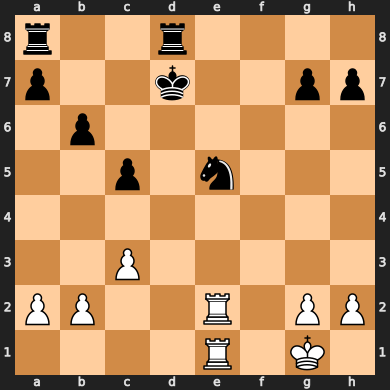

Low computation move: e2e5
 High computation move: e2e5


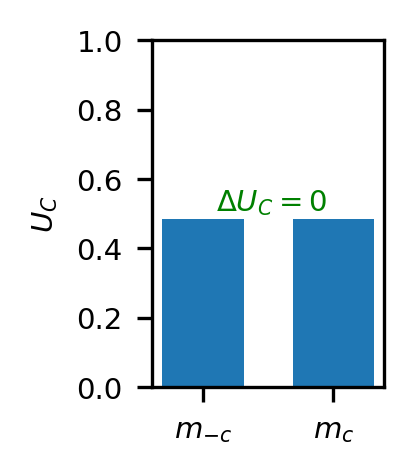

In [60]:

# FIND LOW VOC POTISION BY SORTING BY VOC
n_moves = 1000
move_df_sorted = move_df.loc[move_df.n_pieces < 20].sort_values('voc', ascending=True).reset_index(drop = True).iloc[:n_moves]
game_ids = move_df_sorted.game_id.values
move_plys = move_df_sorted.move_ply.values
fens = move_df_sorted.board
rts = move_df_sorted.rt.values
moves = move_df_sorted.move.values

plt.rcParams.update({'font.size': 7})

# Select move and plot it
move_idx = 80

# Get corresponding SF selections
move_ply=move_plys[move_idx]
game_id = game_ids[move_idx]
fen = fens[move_idx]
move_df_in = depth_df.loc[(depth_df.move_ply == move_ply) & (depth_df.game_id == game_id)].reset_index(drop = True)

display(chess.Board(fen))

# Plot the VOC computation in bar plot
score_wp = move_df_in['score_wp']

if ~move_df_in['white_active'][0]:
    score_wp = 1 - score_wp

 
# Plot
fig,ax = plt.subplots(1,figsize = (1,1.5), dpi = 300)
positions = [0, .8]
ax.bar(positions, [score_wp[0], np.amax(score_wp)], width=.5)
ax.plot([.485, .485], [score_wp[0], np.amax(score_wp)], 'g')
scores = [score_wp[0], np.amax(score_wp)]
plt.text(.08, score_wp[0] + .025, '$\Delta U_C = 0$', color='g')
labels = ['$U_C(m_{-c},s)$ (Best move depth 1)', '$U_C(m_{c},s)$']
labels = ['$m_{-c}$', '$m_{c}$']

ax.set_ylim(0,1)
ax.set_xticks(positions)
ax.set_xticklabels(labels)
ax.set_ylabel('$U_C$')

# plt.savefig('paper_figs/delta_U_Comp_Low.svg',bbox_inches = 'tight', transparent=True) # remake these not normalized ... 
# plt.savefig('paper_figs/delta_U_Comp_Low.pdf', bbox_inches = 'tight',transparent=True) # remake these not normalized ... 

low_comp_move = move_df_in['move'][0]
high_comp_move = move_df_in.loc[move_df_in.score_wp == np.amin(move_df_in.score_wp)]['move'].values[0]
if ~move_df_in['white_active'][0]:

    high_comp_move = move_df_in.loc[move_df_in.score_wp == np.amin(move_df_in.score_wp)]['move'].values[0]
print('Low computation move: {}\n High computation move: {}'.format(low_comp_move, high_comp_move))